<a href="https://colab.research.google.com/github/Brauliovh3/web/blob/main/Tarea_calificada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Introduccion teórica

> con el conjunto de datos que se entrega realizar practica de regresion lineal simple y multiple

> Variables indenpendientes (ej. peso, caballos de fuerza).

> Variables dependientes (ej. consumo: mpg).

Carga de datos: Se obtiene desde un csv en linea (dataset auto mpg).

exploracion inicial: Mostrar primeras filas, info y estadisticas

Regresion lineal simple: ejemplo: mpg - weight.Grafico, con linea de regresion

regresion lineal Multiple: Ejemplo: mpg - weight + horsepower + displacement.Evaluacion con R2 y RMSE




In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("🚗 ANÁLISIS DE REGRESIÓN LINEAL - AUTO MPG")
print("=" * 50)


🚗 ANÁLISIS DE REGRESIÓN LINEAL - AUTO MPG


In [10]:
print("\n📂 1. CARGANDO DATOS...")
# Cargar el archivo CSV local
df = pd.read_csv('auto-mpg.csv')
print(f"Datos originales: {df.shape[0]} filas, {df.shape[1]} columnas")

# Verificar si hay valores '?' (que significa dato faltante en este dataset)
print("\n🔍 Verificando valores faltantes ('?' en el dataset)...")
for col in ['horsepower']:  # La columna horsepower es la que más '?' tiene
    missing_count = (df[col] == '?').sum()
    if missing_count > 0:
        print(f"   - {col}: {missing_count} valores '?'")

# Limpiar datos: convertir '?' a NaN y luego eliminar filas
print("\n🧹 Limpiando datos...")
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # '?' se vuelve NaN
df_clean = df.dropna()  # Eliminar filas con NaN

print(f"Datos después de limpiar: {df_clean.shape[0]} filas")
print(f"Se eliminaron {df.shape[0] - df_clean.shape[0]} filas con datos faltantes")


📂 1. CARGANDO DATOS...
Datos originales: 398 filas, 9 columnas

🔍 Verificando valores faltantes ('?' en el dataset)...
   - horsepower: 6 valores '?'

🧹 Limpiando datos...
Datos después de limpiar: 392 filas
Se eliminaron 6 filas con datos faltantes


In [11]:
print("\n📊 2. EXPLORACIÓN DE DATOS")
print("-" * 30)

# Mostrar primeras filas
print("\nPrimeras 5 filas del dataset:")
print(df_clean.head())

# Estadísticas descriptivas de las variables que vamos a usar
vars_importantes = ['mpg', 'weight', 'horsepower', 'displacement']
print(f"\nEstadísticas de variables importantes:")
print(df_clean[vars_importantes].describe().round(2))

# Correlaciones con MPG (nuestra variable objetivo)
print(f"\n🔗 Correlación con MPG (variable que queremos predecir):")
correlaciones = df_clean[vars_importantes].corr()['mpg'].sort_values(key=abs, ascending=False)
for var, corr in correlaciones.items():
    if var != 'mpg':
        direccion = "📈 Positiva" if corr > 0 else "📉 Negativa"
        print(f"   {var:12}: {corr:6.3f} ({direccion})")


📊 2. EXPLORACIÓN DE DATOS
------------------------------

Primeras 5 filas del dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  

Estadísticas de variables importantes:
          mpg   weight  horsepower  displacement
count  392.00   392.00      392.00        392.00
mean    23.45  2977.58      104.47        194.

In [19]:
print("\n🔸 3. REGRESIÓN LINEAL SIMPLE")
print("-" * 35)
print("Variable dependiente (Y): MPG (millas por galón)")
print("Variable independiente (X): WEIGHT (peso del auto)")

# Preparar datos para regresión simple
X_simple = df_clean[['weight']]    # Variable independiente (debe ser DataFrame)
y = df_clean['mpg']                # Variable dependiente (Serie)

print(f"\nDatos para análisis: {len(X_simple)} observaciones")

# Crear y entrenar el modelo de regresión lineal
modelo_simple = LinearRegression()
modelo_simple.fit(X_simple, y)     # El modelo "aprende" la relación entre weight y mpg

# Hacer predicciones con el modelo entrenado
predicciones_simple = modelo_simple.predict(X_simple)

# Calcular métricas de evaluación
r2_simple = r2_score(y, predicciones_simple)           # R² = qué tan bien explica el modelo
rmse_simple = np.sqrt(mean_squared_error(y, predicciones_simple))  # Error promedio

# Obtener los coeficientes del modelo
intercepto = modelo_simple.intercept_    # Valor de a en: MPG = a + b × Weight
pendiente = modelo_simple.coef_[0]       # Valor de b en: MPG = a + b × Weight

print(f"\n📊 RESULTADOS REGRESIÓN SIMPLE:")
print(f"   R² = {r2_simple:.4f} ({r2_simple*100:.1f}% de varianza explicada)")
print(f"   RMSE = {rmse_simple:.2f} mpg (error promedio)")
print(f"   Ecuación: MPG = {intercepto:.2f} + ({pendiente:.6f}) × Weight")

# Interpretación del resultado
print(f"\n💡 INTERPRETACIÓN:")
if pendiente < 0:
    print(f"   - Por cada libra adicional de peso, el MPG disminuye en {abs(pendiente):.6f}")
    print(f"   - Los autos más pesados consumen MÁS combustible (menos MPG)")
else:
    print(f"   - Por cada libra adicional de peso, el MPG aumenta en {pendiente:.6f}")


🔸 3. REGRESIÓN LINEAL SIMPLE
-----------------------------------
Variable dependiente (Y): MPG (millas por galón)
Variable independiente (X): WEIGHT (peso del auto)

Datos para análisis: 392 observaciones

📊 RESULTADOS REGRESIÓN SIMPLE:
   R² = 0.6926 (69.3% de varianza explicada)
   RMSE = 4.32 mpg (error promedio)
   Ecuación: MPG = 46.22 + (-0.007647) × Weight

💡 INTERPRETACIÓN:
   - Por cada libra adicional de peso, el MPG disminuye en 0.007647
   - Los autos más pesados consumen MÁS combustible (menos MPG)


In [14]:
print("-" * 38)
print("Variable dependiente (Y): MPG")
print("Variables independientes (X): WEIGHT + HORSEPOWER + DISPLACEMENT")

# Preparar datos para regresión múltiple
variables_X = ['weight', 'horsepower', 'displacement']
X_multiple = df_clean[variables_X]

print(f"\nUsando {len(variables_X)} variables predictoras:")
for i, var in enumerate(variables_X, 1):
    print(f"   {i}. {var}")

# Crear y entrenar el modelo múltiple
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_multiple, y)

# Hacer predicciones
predicciones_multiple = modelo_multiple.predict(X_multiple)

# Calcular métricas
r2_multiple = r2_score(y, predicciones_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y, predicciones_multiple))

print(f"\n📊 RESULTADOS REGRESIÓN MÚLTIPLE:")
print(f"   R² = {r2_multiple:.4f} ({r2_multiple*100:.1f}% de varianza explicada)")
print(f"   RMSE = {rmse_multiple:.2f} mpg (error promedio)")

# Mostrar la ecuación completa
print(f"\n📐 ECUACIÓN DEL MODELO MÚLTIPLE:")
ecuacion = f"MPG = {modelo_multiple.intercept_:.2f}"
for i, (var, coef) in enumerate(zip(variables_X, modelo_multiple.coef_)):
    signo = "+" if coef >= 0 else ""
    ecuacion += f" {signo}{coef:.6f}×{var}"
print(f"   {ecuacion}")

# Mostrar importancia de cada variable
print(f"\n🔍 IMPACTO DE CADA VARIABLE:")
for var, coef in zip(variables_X, modelo_multiple.coef_):
    if coef < 0:
        efecto = f"↓ Reduce MPG en {abs(coef):.6f} por unidad"
    else:
        efecto = f"↑ Aumenta MPG en {coef:.6f} por unidad"
    print(f"   {var:12}: {coef:10.6f} ({efecto})")

--------------------------------------
Variable dependiente (Y): MPG
Variables independientes (X): WEIGHT + HORSEPOWER + DISPLACEMENT

Usando 3 variables predictoras:
   1. weight
   2. horsepower
   3. displacement

📊 RESULTADOS REGRESIÓN MÚLTIPLE:
   R² = 0.7070 (70.7% de varianza explicada)
   RMSE = 4.22 mpg (error promedio)

📐 ECUACIÓN DEL MODELO MÚLTIPLE:
   MPG = 44.86 -0.005352×weight -0.041674×horsepower -0.005769×displacement

🔍 IMPACTO DE CADA VARIABLE:
   weight      :  -0.005352 (↓ Reduce MPG en 0.005352 por unidad)
   horsepower  :  -0.041674 (↓ Reduce MPG en 0.041674 por unidad)
   displacement:  -0.005769 (↓ Reduce MPG en 0.005769 por unidad)



📈 6. GENERANDO GRÁFICOS...


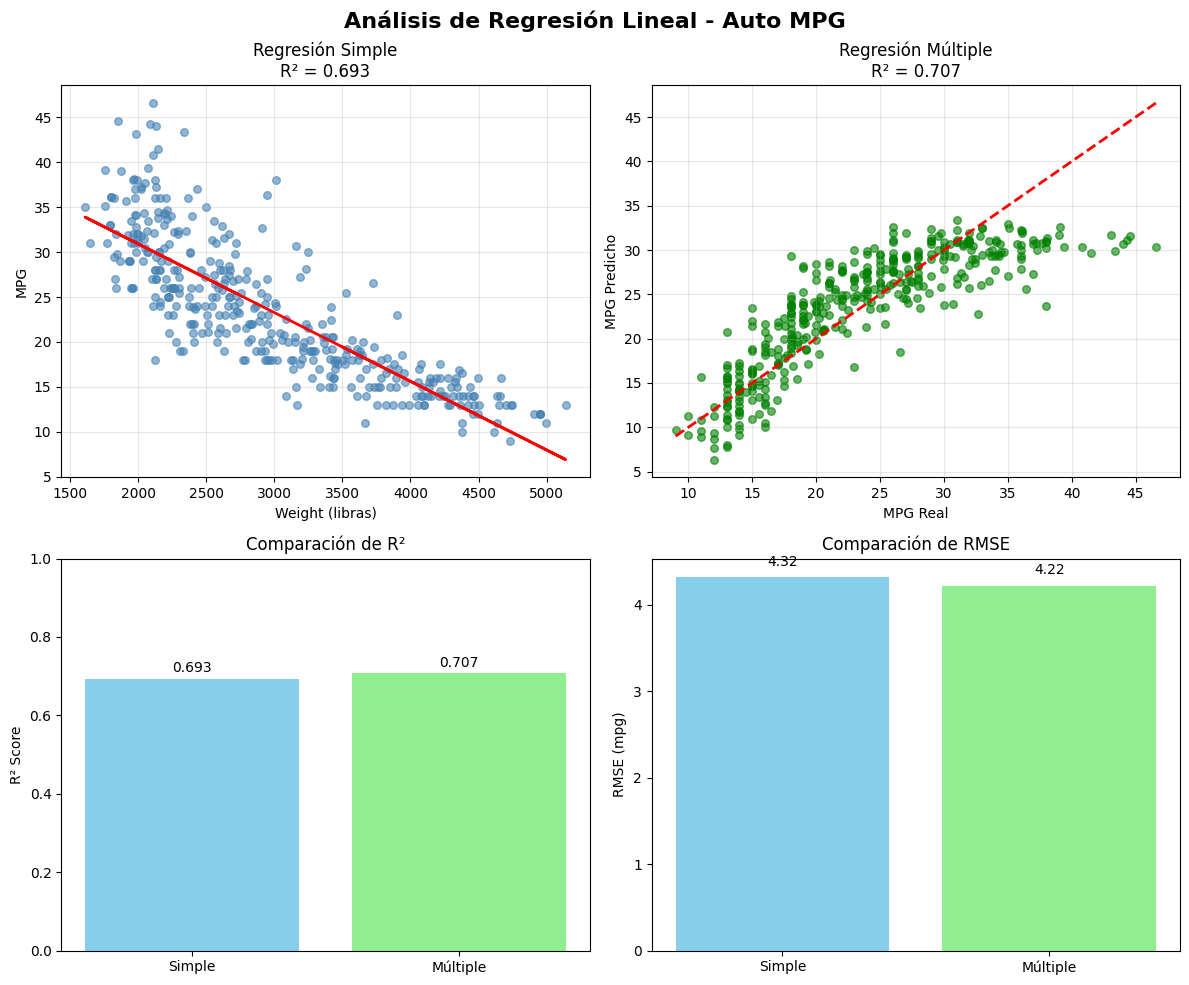

In [16]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Análisis de Regresión Lineal - Auto MPG', fontsize=16, fontweight='bold')

# Gráfico 1: Regresión Simple (scatter + línea)
axes[0,0].scatter(df_clean['weight'], df_clean['mpg'], alpha=0.6, color='steelblue', s=30)
axes[0,0].plot(df_clean['weight'], predicciones_simple, color='red', linewidth=2)
axes[0,0].set_xlabel('Weight (libras)')
axes[0,0].set_ylabel('MPG')
axes[0,0].set_title(f'Regresión Simple\nR² = {r2_simple:.3f}')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Regresión Múltiple (real vs predicho)
axes[0,1].scatter(y, predicciones_multiple, alpha=0.6, color='green', s=30)
axes[0,1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[0,1].set_xlabel('MPG Real')
axes[0,1].set_ylabel('MPG Predicho')
axes[0,1].set_title(f'Regresión Múltiple\nR² = {r2_multiple:.3f}')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Comparación de R²
modelos = ['Simple', 'Múltiple']
r2_valores = [r2_simple, r2_multiple]
colores = ['skyblue', 'lightgreen']
bars = axes[1,0].bar(modelos, r2_valores, color=colores)
axes[1,0].set_ylabel('R² Score')
axes[1,0].set_title('Comparación de R²')
axes[1,0].set_ylim(0, 1)
# Agregar valores en las barras
for bar, valor in zip(bars, r2_valores):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{valor:.3f}', ha='center', va='bottom')

# Gráfico 4: Comparación de RMSE
rmse_valores = [rmse_simple, rmse_multiple]
bars = axes[1,1].bar(modelos, rmse_valores, color=colores)
axes[1,1].set_ylabel('RMSE (mpg)')
axes[1,1].set_title('Comparación de RMSE')
# Agregar valores en las barras
for bar, valor in zip(bars, rmse_valores):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{valor:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [18]:
print(f"\n🎯 RESUMEN FINAL")
print("=" * 50)

print(f"📊 DATASET ANALIZADO:")
print(f"   • {len(df_clean)} vehículos analizados")
print(f"   • Variable objetivo: MPG (consumo de combustible)")

print(f"\n🔸 REGRESIÓN SIMPLE (Weight → MPG):")
print(f"   • Explica {r2_simple*100:.1f}% de la variabilidad")
print(f"   • Error promedio: {rmse_simple:.2f} mpg")
print(f"   • Relación: A mayor peso → menor MPG")

print(f"\n🔹 REGRESIÓN MÚLTIPLE (Weight+HP+Displacement → MPG):")
print(f"   • Explica {r2_multiple*100:.1f}% de la variabilidad")
print(f"   • Error promedio: {rmse_multiple:.2f} mpg")
print(f"   • Mejora de {mejora_r2:.1f}% sobre modelo simple")

print(f"\n💡 CONCLUSIÓN PRÁCTICA:")
if r2_multiple > 0.8:
    print(f"   ✅ El modelo múltiple es excelente para predecir MPG")
elif r2_multiple > 0.6:
    print(f"   ✅ El modelo múltiple es bueno para predecir MPG")
else:
    print(f"   ⚠️ El modelo necesita más variables para mejor precisión")

print(f"\n   🚗 Puedes usar este modelo para estimar cuánto combustible")
print(f"       consumirá un auto conociendo su peso, potencia y cilindrada.")


🎯 RESUMEN FINAL
📊 DATASET ANALIZADO:
   • 392 vehículos analizados
   • Variable objetivo: MPG (consumo de combustible)

🔸 REGRESIÓN SIMPLE (Weight → MPG):
   • Explica 69.3% de la variabilidad
   • Error promedio: 4.32 mpg
   • Relación: A mayor peso → menor MPG

🔹 REGRESIÓN MÚLTIPLE (Weight+HP+Displacement → MPG):
   • Explica 70.7% de la variabilidad
   • Error promedio: 4.22 mpg
   • Mejora de 2.1% sobre modelo simple

💡 CONCLUSIÓN PRÁCTICA:
   ✅ El modelo múltiple es bueno para predecir MPG

   🚗 Puedes usar este modelo para estimar cuánto combustible
       consumirá un auto conociendo su peso, potencia y cilindrada.

✅ ¡Análisis completado exitosamente!
